**<font size=6>神经网络基础</font>**

**<font size=5>一、神经网络的数据表示</font>**

可以使用ndim属性查看一个numpy张量的轴的个数

In [1]:
import numpy as np

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images.ndim

3

就拿mnist数据集中的数据来说，明显它们是三维张量

In [6]:
x = np.array(12)

In [7]:
x.ndim

0

标量张量有0个轴

In [8]:
train_images.dtype

dtype('uint8')

**<font size=4 color="red">1. 现实世界中的数据张量</font>**<br>
**向量数据**：2D张量，（samples, features）<br>
**时间序列数据**:3D张量，（samples, timesteps, features）<br>
**图像**:4D张量，（samples, height, width, channels）<br>
**视频**:5D张量，（samples, frames, height, width, channels）

**1. 向量数据**<br>

一般是2D向量，第一轴是样本轴，第二个轴是特征轴

**2. 时间序列数据**<br>

3D数据，时间轴始终是第2个轴（索引为1的轴）
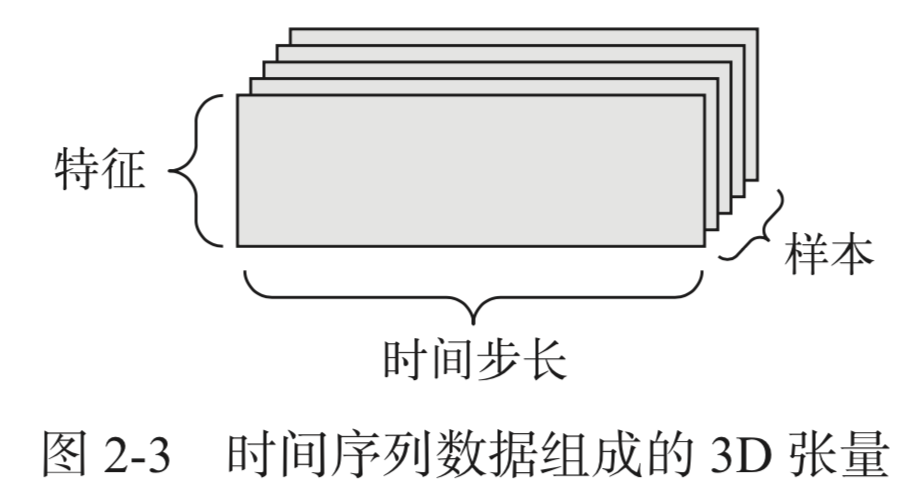

**3. 图像数据**<br>

三维：高度、宽度和颜色深度。彩色图像的通道有3个，而灰度图像的通道只有一维。
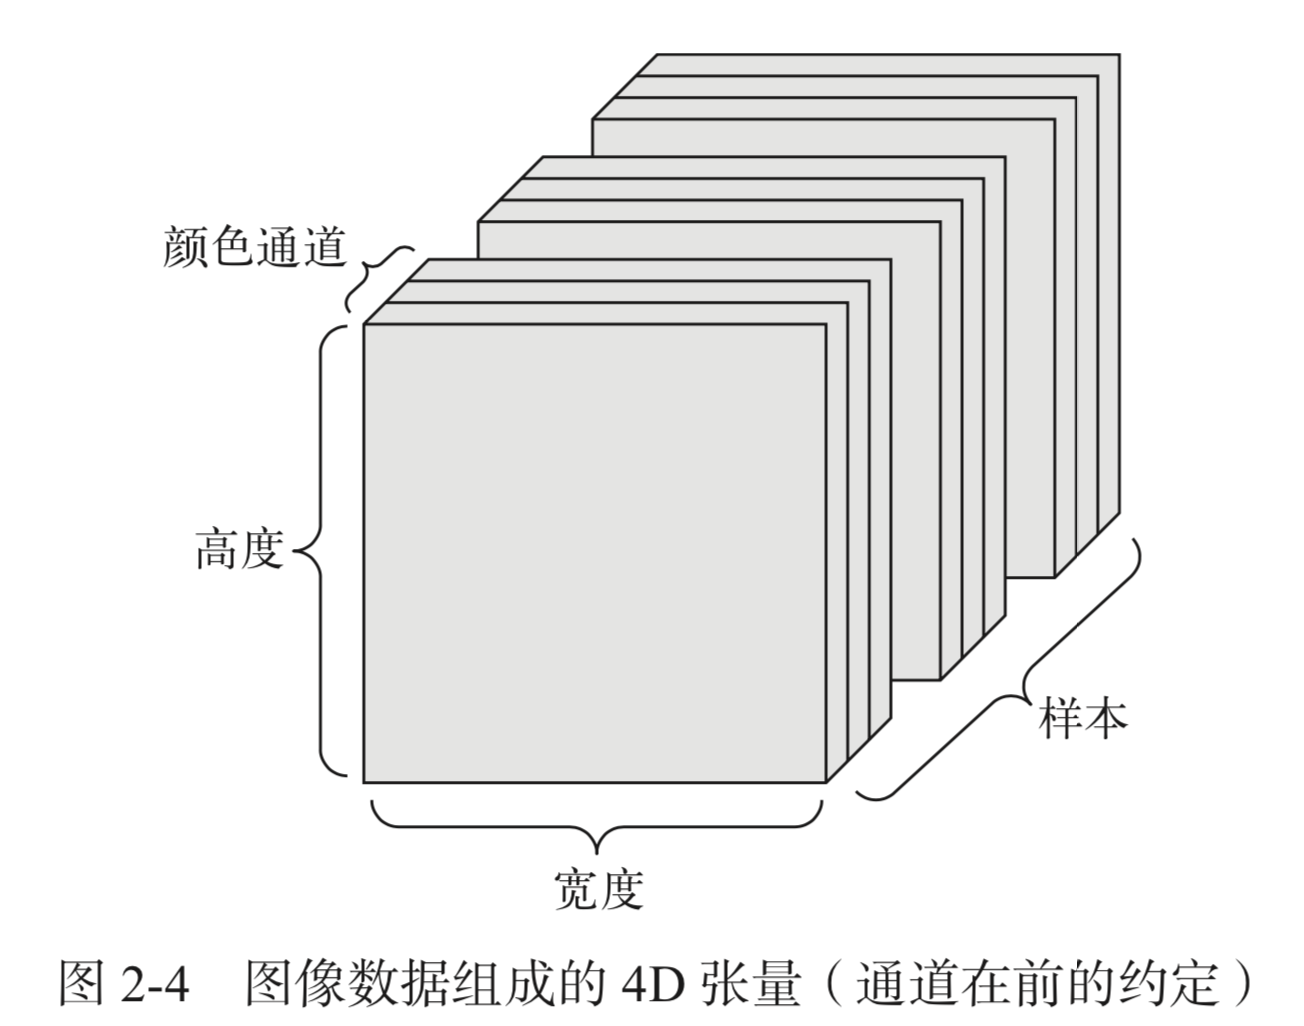

图像张量的形状有两种约定：<br>
**通道在后：**TensorFlow中使用（samples, height, width, channels）<br>
**通道在前：**Theano中使用（samples, channels, height, width）<br>

**4. 视频数据**<br>

5D，视频可以看作一系列帧，每一帧都是一张彩色图像。每一帧都保存在一个形状为（height,width,channels）的3D张量中，一系列帧都可以保存在一个形状为（frames, height,width,channels）的4D张量中，而不同视频组成的批量保存在5D张量(samples,frames,height,width,channels)。

**<font size=4>2. relu计算</font>**

手动实现relu（dot(w,input)+b）

relu运算和加法都是逐个元素的运算，即该运算独立得应用张量中的每个数据

In [9]:
def naive_relu(x):
    #保证x是一个二维矩阵
    assert len(x.shape) == 2
    
    x = x.copy
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = np.max(x[i, j], 0)
    
    return x

In [10]:
def naive_add(x, y):
    #x和y的维数一样，都是二维数据
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i, j]
    
    return x

当然，很多时候最好使用numpy内置的计算方法，速度会很快。<br>
矩阵加法：x+y 实现逐个元素相加<br>
relu：np.maximum(z, 0)实现逐元素的relu

**<font size=4>3. 张量点积</font>**

在Numpy、Keras、Tensorflow、Theano中都用*实现逐元素乘积，但在Numpy、Keras中使用标准的dot运算实现点积。

**<font size=4>4. 随机梯度下降SGD</font>**

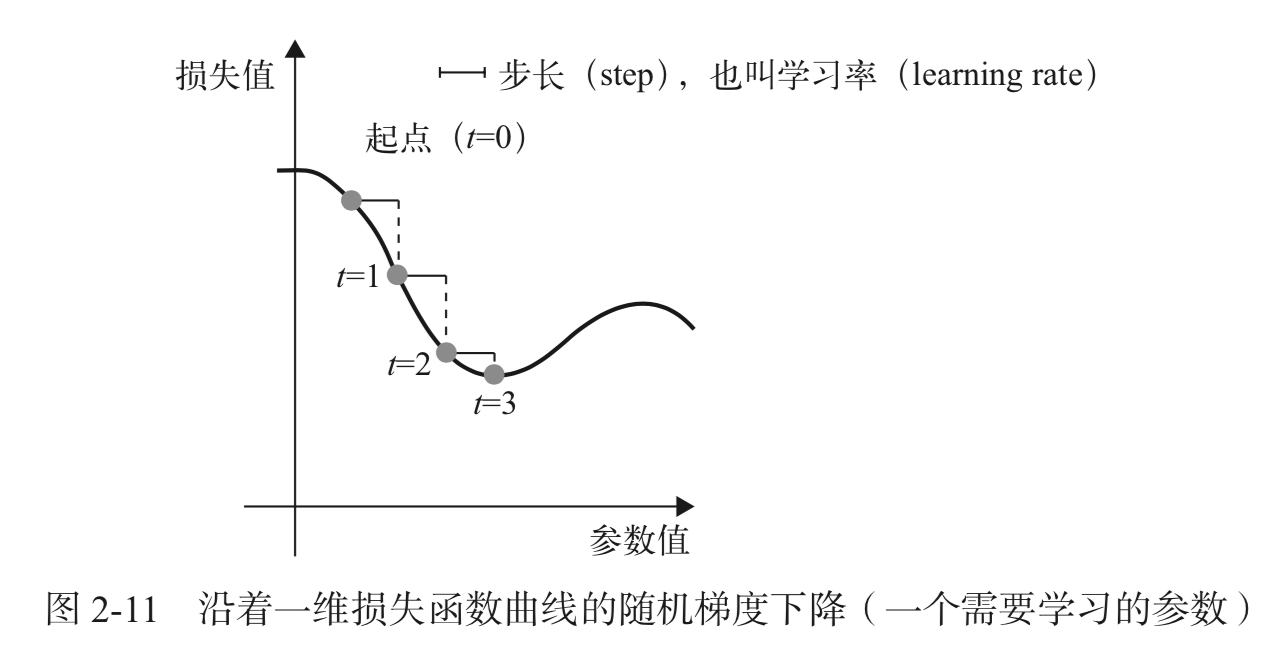

SGD有多种变体，其区别在于计算下一次权重更新时还要考虑上一次权重更新，而不是仅仅考虑当前梯度值。比如带动量的SGD、RMSProp等。这些变体被称为优化方法，其中动量解决了SGD的两个问题：收敛速度和局部极小点。
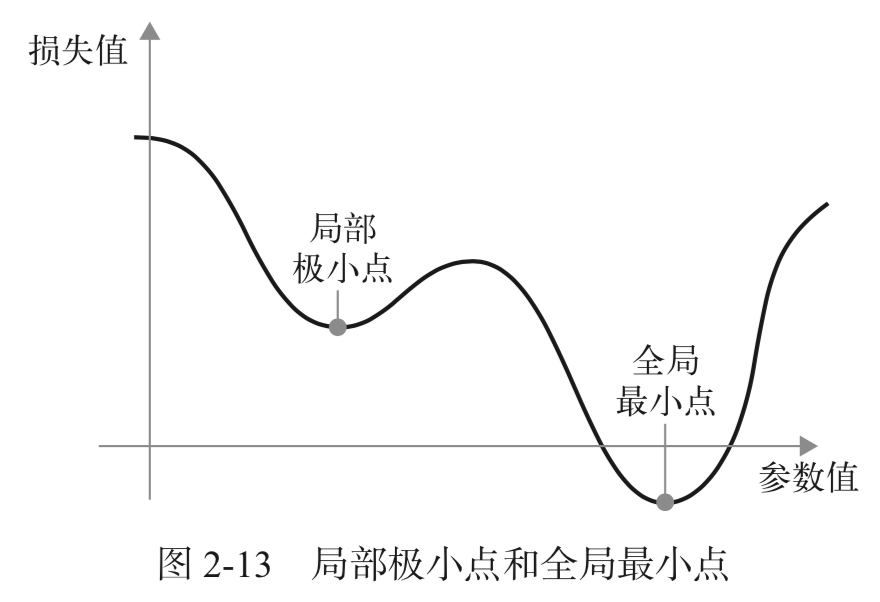